In [1]:
# import cv2

# # function to display the coordinates of the points clicked on the image
# def click_event(event, x, y, flags, params):
#     img = params['img']
#     window_name = params['window_name']
    
#     # checking for left mouse clicks
#     if event == cv2.EVENT_LBUTTONDOWN:
#         # displaying the coordinates on the Shell
#         print(f"Left click at ({x}, {y}) on {window_name}")
#         # displaying the coordinates on the image window
#         font = cv2.FONT_HERSHEY_SIMPLEX
#         cv2.putText(img, str(x) + ',' + str(y), (x, y), font, 1, (255, 0, 0), 2)
#         cv2.imshow(window_name, img)

#     # checking for right mouse clicks
#     if event == cv2.EVENT_RBUTTONDOWN:
#         # displaying the coordinates on the Shell
#         print(f"Right click at ({x}, {y}) on {window_name}")
#         # displaying the coordinates on the image window
#         font = cv2.FONT_HERSHEY_SIMPLEX
#         b = img[y, x, 0]
#         g = img[y, x, 1]
#         r = img[y, x, 2]
#         cv2.putText(img, f"{b},{g},{r}", (x, y), font, 1, (255, 255, 0), 2)
#         cv2.imshow(window_name, img)

# # driver function
# if __name__ == "__main__":
#     # reading the images
#     img1 = cv2.imread('./frames/frame16.bmp', 1)
#     img2 = cv2.imread('./frames/frame17.bmp', 1)
#     img3 = cv2.imread('./frames/frame19.bmp', 1)
#     img4 = cv2.imread('./frames/frame20.bmp', 1)

#     # displaying the images
#     cv2.imshow('image1', img1)
#     cv2.imshow('image2', img2)
#     cv2.imshow('image3', img3)
#     cv2.imshow('image4', img4)

#     # setting mouse handler for the images and calling the click_event() function
#     cv2.setMouseCallback('image1', click_event, {'img': img1, 'window_name': 'image1'})
#     cv2.setMouseCallback('image2', click_event, {'img': img2, 'window_name': 'image2'})
#     cv2.setMouseCallback('image3', click_event, {'img': img3, 'window_name': 'image3'})
#     cv2.setMouseCallback('image4', click_event, {'img': img4, 'window_name': 'image4'})

#     # Main loop
#     while True:
#         # Wait for a key event indefinitely or for 20 ms, allowing us to process the window events
#         key = cv2.waitKey(20)
#         # Exit if 'q' is pressed
#         if key == ord('q'):
#             break

#     # close the windows
#     cv2.destroyAllWindows()


Manual Measurement Diesel Spray 0.75 (2 frames)

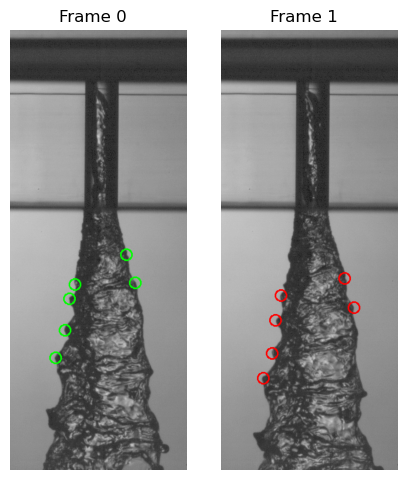

True

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Definisi posisi frame dan displacement
frame_positions = [
    ((210, 409), (223, 452)),
    ((226, 460), (240, 505)),
    ((117, 463), (108, 483)),
    ((107, 489), (98, 528)),
    ((99, 546), (92, 588)),
    ((82, 596), (76, 633)),
]

# Load the actual images
frame0 = cv2.imread('../Video/Frames1.20/frame0.bmp', cv2.IMREAD_COLOR)
frame1 = cv2.imread('../Video/Frames1.20/frame1.bmp', cv2.IMREAD_COLOR)

# Draw circles on the images at the bubble's positions
for pos_frame0, pos_frame1 in frame_positions:
    cv2.circle(frame0, pos_frame0, 10, (0, 255, 0), 2)  # Green circle for frame 0
    cv2.circle(frame1, pos_frame1, 10, (0, 0, 255), 2)  # Red circle for frame 1

# Convert images to RGB (Matplotlib expects RGB format)
frame0_rgb = cv2.cvtColor(frame0, cv2.COLOR_BGR2RGB)
frame1_rgb = cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB)

# Display the images
plt.figure( figsize=(5, 10))
plt.subplot(1, 2, 1)
plt.imshow(frame0_rgb)
plt.title('Frame 0  ')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(frame1_rgb)
plt.title('Frame 1  ')
plt.axis('off')

plt.show()
cv2.imwrite('../video/pemilihan fitur/1.20/frame0_with_circles.jpg', frame0)

In [3]:
# Calculate displacement and velocity for each frame position
objectdistance = 0.002  # ukuran diameter pipa
imagedistance = 60  # 0.002 m = 60 pixel pada gambar
frame_rate = 4500  # Frame per detik
velocities = []

for pos_frame0, pos_frame1 in frame_positions:
    # Calculate displacement using the Euclidean distance formula
    displacement = ((pos_frame1[0] - pos_frame0[0]) ** 2 + (pos_frame1[1] - pos_frame0[1]) ** 2) ** 0.5
    
    # Convert displacement from pixel to real distance in meter
    real_distance_m = displacement * (objectdistance / imagedistance)
    
    # Calculate time between two frames (seconds)
    time_between_frames = 1 / frame_rate
    
    # Calculate velocity (meter per second)
    velocity = real_distance_m / time_between_frames

    # Tambahkan kecepatan ke dalam list
    velocities.append(velocity)
    
    print("Displacements :", displacement, "pixels")
    print("Velocity:", velocity, "m/s")
    print()

mean1 = sum(velocities) / len(velocities)

print("Average Velocity:", mean1, "m/s")

Displacements : 44.9221548904324 pixels
Velocity: 6.73832323356486 m/s

Displacements : 47.12748667179272 pixels
Velocity: 7.069123000768907 m/s

Displacements : 21.93171219946131 pixels
Velocity: 3.289756829919196 m/s

Displacements : 40.024992192379 pixels
Velocity: 6.003748828856851 m/s

Displacements : 42.579337712087536 pixels
Velocity: 6.38690065681313 m/s

Displacements : 37.48332962798263 pixels
Velocity: 5.622499444197394 m/s

Average Velocity: 5.851725332353389 m/s


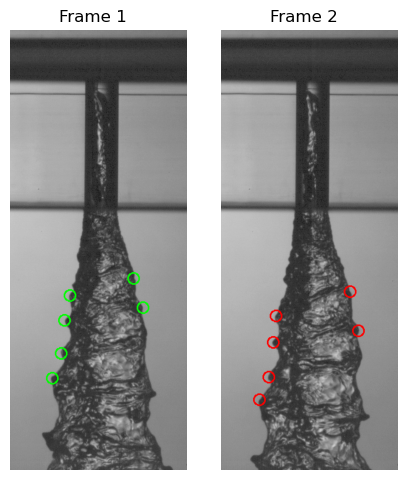

True

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Definisi posisi frame dan displacement
frame_positions = [
    ((223, 452),(233, 476)),
    ((240, 505),(248, 547)),
    ((108, 483),(99, 520)),
    ((98, 528),(94, 568)),
    ((92, 588),(86, 631)),
    ((76, 633),(69, 672)),
]

# Load the actual images
frame0 = cv2.imread('../Video/Frames1.20/frame1.bmp', cv2.IMREAD_COLOR)
frame1 = cv2.imread('../Video/Frames1.20/frame2.bmp', cv2.IMREAD_COLOR)

# Draw circles on the images at the bubble's positions
for pos_frame0, pos_frame1 in frame_positions:
    cv2.circle(frame0, pos_frame0, 10, (0, 255, 0), 2)  # Green circle for frame 0
    cv2.circle(frame1, pos_frame1, 10, (0, 0, 255), 2)  # Red circle for frame 1

# Convert images to RGB (Matplotlib expects RGB format)
frame0_rgb = cv2.cvtColor(frame0, cv2.COLOR_BGR2RGB)
frame1_rgb = cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB)

# Display the images
plt.figure( figsize=(5, 10))
plt.subplot(1, 2, 1)
plt.imshow(frame0_rgb)
plt.title('Frame 1  ')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(frame1_rgb)
plt.title('Frame 2  ')
plt.axis('off')

plt.show()


cv2.imwrite('../video/pemilihan fitur/1.20/frame1_with_circles.jpg', frame0)

In [5]:
# Calculate displacement and velocity for each frame position
objectdistance = 0.002  # ukuran diameter pipa
imagedistance = 60  # 0.002 m = 60 pixel pada gambar
frame_rate = 4500  # Frame per detik
velocities = []

for pos_frame0, pos_frame1 in frame_positions:
    # Calculate displacement using the Euclidean distance formula
    displacement = ((pos_frame1[0] - pos_frame0[0]) ** 2 + (pos_frame1[1] - pos_frame0[1]) ** 2) ** 0.5
    
    # Convert displacement from pixel to real distance in meter
    real_distance_m = displacement * (objectdistance / imagedistance)
    
    # Calculate time between two frames (seconds)
    time_between_frames = 1 / frame_rate
    
    # Calculate velocity (meter per second)
    velocity = real_distance_m / time_between_frames

    # Tambahkan kecepatan ke dalam list
    velocities.append(velocity)
    
    print("Displacements :", displacement, "pixels")
    print("Velocity:", velocity, "m/s")
    print()

mean2 = sum(velocities) / len(velocities)

print("Velocity:", mean2, "m/s")

Displacements : 26.0 pixels
Velocity: 3.9 m/s

Displacements : 42.7551166528639 pixels
Velocity: 6.413267497929584 m/s

Displacements : 38.07886552931954 pixels
Velocity: 5.7118298293979315 m/s

Displacements : 40.19950248448356 pixels
Velocity: 6.029925372672534 m/s

Displacements : 43.41658669218482 pixels
Velocity: 6.512488003827723 m/s

Displacements : 39.6232255123179 pixels
Velocity: 5.943483826847685 m/s

Velocity: 5.751832421779242 m/s


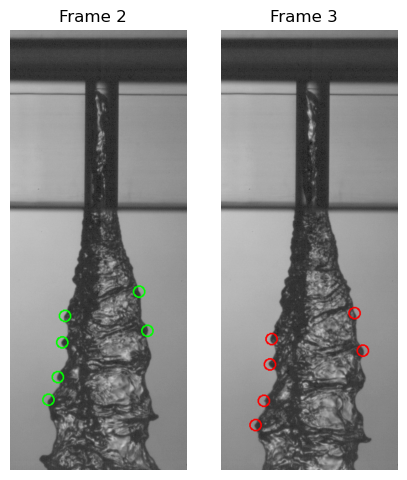

True

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Definisi posisi frame dan displacement

frame_positions = [
   ((233, 476),(241, 515)),
    ((248, 547),(256, 583)),
    ((99, 520),(91, 562)),
    ((94, 568),(88, 608)),
    ((86, 631),(77, 674)),
    ((69, 672),(62, 718)),
]

# Load the actual images
frame0 = cv2.imread('../Video/Frames1.20/frame2.bmp', cv2.IMREAD_COLOR)
frame1 = cv2.imread('../Video/Frames1.20/frame3.bmp', cv2.IMREAD_COLOR)

# Draw circles on the images at the bubble's positions
for pos_frame0, pos_frame1 in frame_positions:
    cv2.circle(frame0, pos_frame0, 10, (0, 255, 0), 2)  # Green circle for frame 0
    cv2.circle(frame1, pos_frame1, 10, (0, 0, 255), 2)  # Red circle for frame 1

# Convert images to RGB (Matplotlib expects RGB format)
frame0_rgb = cv2.cvtColor(frame0, cv2.COLOR_BGR2RGB)
frame1_rgb = cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB)

# Display the images
plt.figure( figsize=(5, 10))
plt.subplot(1, 2, 1)
plt.imshow(frame0_rgb)
plt.title('Frame 2  ')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(frame1_rgb)
plt.title('Frame 3  ')
plt.axis('off')

plt.show()

cv2.imwrite('../video/pemilihan fitur/1.20/frame2_with_circles.jpg', frame0)

In [7]:
# Calculate displacement and velocity for each frame position
objectdistance = 0.002  # ukuran diameter pipa
imagedistance = 60  # 0.002 m = 60 pixel pada gambar
frame_rate = 4500  # Frame per detik
velocities = []

for pos_frame0, pos_frame1 in frame_positions:
    # Calculate displacement using the Euclidean distance formula
    displacement = ((pos_frame1[0] - pos_frame0[0]) ** 2 + (pos_frame1[1] - pos_frame0[1]) ** 2) ** 0.5
    
    # Convert displacement from pixel to real distance in meter
    real_distance_m = displacement * (objectdistance / imagedistance)
    
    # Calculate time between two frames (seconds)
    time_between_frames = 1 / frame_rate
    
    # Calculate velocity (meter per second)
    velocity = real_distance_m / time_between_frames

    # Tambahkan kecepatan ke dalam list
    velocities.append(velocity)
    
    print("Displacements :", displacement, "pixels")
    print("Velocity:", velocity, "m/s")
    print()

mean3 = sum(velocities) / len(velocities)

print("Velocity:", mean3, "m/s")

Displacements : 39.81205847478876 pixels
Velocity: 5.971808771218314 m/s

Displacements : 36.87817782917155 pixels
Velocity: 5.531726674375732 m/s

Displacements : 42.7551166528639 pixels
Velocity: 6.413267497929584 m/s

Displacements : 40.44749683231337 pixels
Velocity: 6.067124524847006 m/s

Displacements : 43.93176527297759 pixels
Velocity: 6.589764790946639 m/s

Displacements : 46.52956049652737 pixels
Velocity: 6.979434074479105 m/s

Velocity: 6.258854388966064 m/s


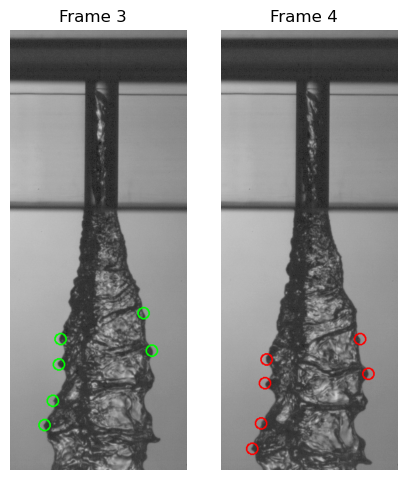

True

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Definisi posisi frame dan displacement
frame_positions = [
   ((241, 515),(251, 562)),
    ((256, 583),(266, 625)),
    ((91, 562),(82, 599)),
    ((88, 608),(79, 642)),
    ((77, 674),(72, 715)),
    ((62, 718),(56, 761)),
]

# Load the actual images
frame0 = cv2.imread('../Video/Frames1.20/frame3.bmp', cv2.IMREAD_COLOR)
frame1 = cv2.imread('../Video/Frames1.20/frame4.bmp', cv2.IMREAD_COLOR)

# Draw circles on the images at the bubble's positions
for pos_frame0, pos_frame1 in frame_positions:
    cv2.circle(frame0, pos_frame0, 10, (0, 255, 0), 2)  # Green circle for frame 0
    cv2.circle(frame1, pos_frame1, 10, (0, 0, 255), 2)  # Red circle for frame 1

# Convert images to RGB (Matplotlib expects RGB format)
frame0_rgb = cv2.cvtColor(frame0, cv2.COLOR_BGR2RGB)
frame1_rgb = cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB)

# Display the images
plt.figure( figsize=(5, 10))
plt.subplot(1, 2, 1)
plt.imshow(frame0_rgb)
plt.title('Frame 3  ')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(frame1_rgb)
plt.title('Frame 4  ')
plt.axis('off')

plt.show()
cv2.imwrite('../video/pemilihan fitur/1.20/frame3_with_circles.jpg', frame0)

In [9]:
# Calculate displacement and velocity for each frame position
objectdistance = 0.002  # ukuran diameter pipa
imagedistance = 60  # 0.002 m = 60 pixel pada gambar
frame_rate = 4500  # Frame per detik
velocities = []

for pos_frame0, pos_frame1 in frame_positions:
    # Calculate displacement using the Euclidean distance formula
    displacement = ((pos_frame1[0] - pos_frame0[0]) ** 2 + (pos_frame1[1] - pos_frame0[1]) ** 2) ** 0.5
    
    # Convert displacement from pixel to real distance in meter
    real_distance_m = displacement * (objectdistance / imagedistance)
    
    # Calculate time between two frames (seconds)
    time_between_frames = 1 / frame_rate
    
    # Calculate velocity (meter per second)
    velocity = real_distance_m / time_between_frames

    # Tambahkan kecepatan ke dalam list
    velocities.append(velocity)
    
    print("Displacements :", displacement, "pixels")
    print("Velocity:", velocity, "m/s")
    print()

mean4 = sum(velocities) / len(velocities)

print("Velocity:", mean4, "m/s")

Displacements : 48.05205510693585 pixels
Velocity: 7.207808266040378 m/s

Displacements : 43.174066289845804 pixels
Velocity: 6.476109943476871 m/s

Displacements : 38.07886552931954 pixels
Velocity: 5.7118298293979315 m/s

Displacements : 35.17101079013795 pixels
Velocity: 5.275651618520692 m/s

Displacements : 41.30375285612676 pixels
Velocity: 6.195562928419014 m/s

Displacements : 43.41658669218482 pixels
Velocity: 6.512488003827723 m/s

Velocity: 6.229908431613768 m/s


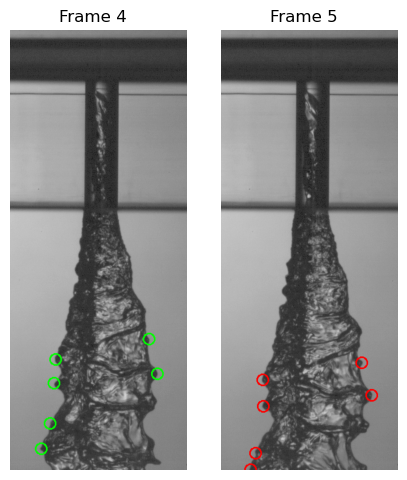

True

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Definisi posisi frame dan displacement
frame_positions = [
   ((251, 562),(254, 605)),
    ((266, 625),(272, 664)),
    ((82, 599),(75, 636)),
    ((79, 642),(76, 684)),
    ((72, 715),(62, 769)),
    ((56, 761),(53, 799)),
]

# Load the actual images
frame0 = cv2.imread('../Video/Frames1.20/frame4.bmp', cv2.IMREAD_COLOR)
frame1 = cv2.imread('../Video/Frames1.20/frame5.bmp', cv2.IMREAD_COLOR)

# Draw circles on the images at the bubble's positions
for pos_frame0, pos_frame1 in frame_positions:
    cv2.circle(frame0, pos_frame0, 10, (0, 255, 0), 2)  # Green circle for frame 0
    cv2.circle(frame1, pos_frame1, 10, (0, 0, 255), 2)  # Red circle for frame 1

# Convert images to RGB (Matplotlib expects RGB format)
frame0_rgb = cv2.cvtColor(frame0, cv2.COLOR_BGR2RGB)
frame1_rgb = cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB)

# Display the images
plt.figure( figsize=(5, 10))
plt.subplot(1, 2, 1)
plt.imshow(frame0_rgb)
plt.title('Frame 4  ')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(frame1_rgb)
plt.title('Frame 5  ')
plt.axis('off')

plt.show()
cv2.imwrite('../video/pemilihan fitur/1.20/frame4_with_circles.jpg', frame0)

In [11]:
# Calculate displacement and velocity for each frame position
objectdistance = 0.002  # ukuran diameter pipa
imagedistance = 60  # 0.002 m = 60 pixel pada gambar
frame_rate = 4500  # Frame per detik
velocities = []

for pos_frame0, pos_frame1 in frame_positions:
    # Calculate displacement using the Euclidean distance formula
    displacement = ((pos_frame1[0] - pos_frame0[0]) ** 2 + (pos_frame1[1] - pos_frame0[1]) ** 2) ** 0.5
    
    # Convert displacement from pixel to real distance in meter
    real_distance_m = displacement * (objectdistance / imagedistance)
    
    # Calculate time between two frames (seconds)
    time_between_frames = 1 / frame_rate
    
    # Calculate velocity (meter per second)
    velocity = real_distance_m / time_between_frames

    # Tambahkan kecepatan ke dalam list
    velocities.append(velocity)
    
    print("Displacements :", displacement, "pixels")
    print("Velocity:", velocity, "m/s")
    print()

mean5 = sum(velocities) / len(velocities)

print("Velocity:", mean5, "m/s")

Displacements : 43.104524124504614 pixels
Velocity: 6.4656786186756925 m/s

Displacements : 39.45883931389772 pixels
Velocity: 5.918825897084658 m/s

Displacements : 37.656340767525464 pixels
Velocity: 5.64845111512882 m/s

Displacements : 42.1070065428546 pixels
Velocity: 6.31605098142819 m/s

Displacements : 54.91812087098393 pixels
Velocity: 8.23771813064759 m/s

Displacements : 38.118237105091836 pixels
Velocity: 5.717735565763775 m/s

Velocity: 6.384076718121453 m/s


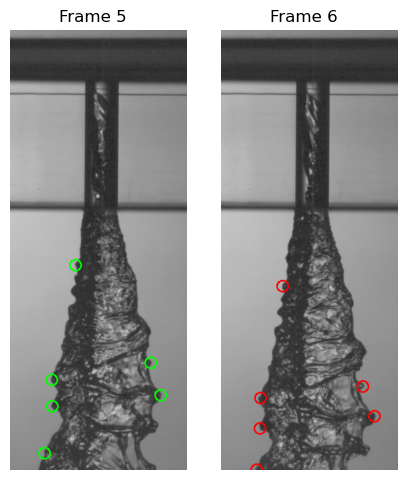

True

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Definisi posisi frame dan displacement
frame_positions = [
   ((254, 605),(256, 648)),
    ((272, 664),(277, 702)),
    ((75, 636),(71, 669)),
    ((76, 684),(70, 724)),
    ((62, 769),(64, 799)),
    ((118, 428),(111, 466)), 
]

# Load the actual images
frame0 = cv2.imread('../Video/Frames1.20/frame5.bmp', cv2.IMREAD_COLOR)
frame1 = cv2.imread('../Video/Frames1.20/frame6.bmp', cv2.IMREAD_COLOR)

# Draw circles on the images at the bubble's positions
for pos_frame0, pos_frame1 in frame_positions:
    cv2.circle(frame0, pos_frame0, 10, (0, 255, 0), 2)  # Green circle for frame 0
    cv2.circle(frame1, pos_frame1, 10, (0, 0, 255), 2)  # Red circle for frame 1

# Convert images to RGB (Matplotlib expects RGB format)
frame0_rgb = cv2.cvtColor(frame0, cv2.COLOR_BGR2RGB)
frame1_rgb = cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB)

# Display the images
plt.figure( figsize=(5, 10))
plt.subplot(1, 2, 1)
plt.imshow(frame0_rgb)
plt.title('Frame 5  ')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(frame1_rgb)
plt.title('Frame 6  ')
plt.axis('off')

plt.show()
cv2.imwrite('../video/pemilihan fitur/1.20/frame5_with_circles.jpg', frame0)

In [13]:
# Calculate displacement and velocity for each frame position
objectdistance = 0.002  # ukuran diameter pipa
imagedistance = 60  # 0.002 m = 60 pixel pada gambar
frame_rate = 4500  # Frame per detik
velocities = []

for pos_frame0, pos_frame1 in frame_positions:
    # Calculate displacement using the Euclidean distance formula
    displacement = ((pos_frame1[0] - pos_frame0[0]) ** 2 + (pos_frame1[1] - pos_frame0[1]) ** 2) ** 0.5
    
    # Convert displacement from pixel to real distance in meter
    real_distance_m = displacement * (objectdistance / imagedistance)
    
    # Calculate time between two frames (seconds)
    time_between_frames = 1 / frame_rate
    
    # Calculate velocity (meter per second)
    velocity = real_distance_m / time_between_frames

    # Tambahkan kecepatan ke dalam list
    velocities.append(velocity)
    
    print("Displacements :", displacement, "pixels")
    print("Velocity:", velocity, "m/s")
    print()

mean6 = sum(velocities) / len(velocities)

print("Velocity:", mean6, "m/s")

Displacements : 43.04648650006177 pixels
Velocity: 6.456972975009266 m/s

Displacements : 38.3275357934736 pixels
Velocity: 5.74913036902104 m/s

Displacements : 33.24154027718932 pixels
Velocity: 4.986231041578399 m/s

Displacements : 40.44749683231337 pixels
Velocity: 6.067124524847006 m/s

Displacements : 30.066592756745816 pixels
Velocity: 4.509988913511872 m/s

Displacements : 38.63935817272331 pixels
Velocity: 5.795903725908497 m/s

Velocity: 5.5942252583126795 m/s


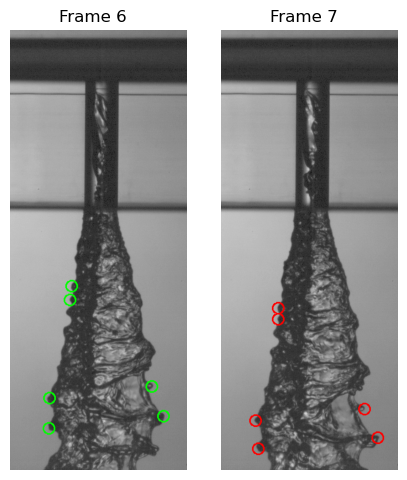

True

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Definisi posisi frame dan displacement
frame_positions = [
   ((256, 648),(259, 689)),
    ((277, 702),(283, 741)),
    ((71, 669),(62, 710)),
    ((70, 724),(67, 761)),
    ((108, 491),(103, 526)),
    ((111, 466),(103, 506)), 
]

# Load the actual images
frame0 = cv2.imread('../Video/Frames1.20/frame6.bmp', cv2.IMREAD_COLOR)
frame1 = cv2.imread('../Video/Frames1.20/frame7.bmp', cv2.IMREAD_COLOR)

# Draw circles on the images at the bubble's positions
for pos_frame0, pos_frame1 in frame_positions:
    cv2.circle(frame0, pos_frame0, 10, (0, 255, 0), 2)  # Green circle for frame 0
    cv2.circle(frame1, pos_frame1, 10, (0, 0, 255), 2)  # Red circle for frame 1

# Convert images to RGB (Matplotlib expects RGB format)
frame0_rgb = cv2.cvtColor(frame0, cv2.COLOR_BGR2RGB)
frame1_rgb = cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB)

# Display the images
plt.figure( figsize=(5, 10))
plt.subplot(1, 2, 1)
plt.imshow(frame0_rgb)
plt.title('Frame 6  ')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(frame1_rgb)
plt.title('Frame 7  ')
plt.axis('off')

plt.show()
cv2.imwrite('../video/pemilihan fitur/1.20/frame6_with_circles.jpg', frame0)

In [15]:
# Calculate displacement and velocity for each frame position
objectdistance = 0.002  # ukuran diameter pipa
imagedistance = 60  # 0.002 m = 60 pixel pada gambar
frame_rate = 4500  # Frame per detik
velocities = []

for pos_frame0, pos_frame1 in frame_positions:
    # Calculate displacement using the Euclidean distance formula
    displacement = ((pos_frame1[0] - pos_frame0[0]) ** 2 + (pos_frame1[1] - pos_frame0[1]) ** 2) ** 0.5
    
    # Convert displacement from pixel to real distance in meter
    real_distance_m = displacement * (objectdistance / imagedistance)
    
    # Calculate time between two frames (seconds)
    time_between_frames = 1 / frame_rate
    
    # Calculate velocity (meter per second)
    velocity = real_distance_m / time_between_frames

    # Tambahkan kecepatan ke dalam list
    velocities.append(velocity)
    
    print("Displacements :", displacement, "pixels")
    print("Velocity:", velocity, "m/s")
    print()

mean7 = sum(velocities) / len(velocities)

print("Velocity:", mean7, "m/s")

Displacements : 41.10960958218893 pixels
Velocity: 6.16644143732834 m/s

Displacements : 39.45883931389772 pixels
Velocity: 5.918825897084658 m/s

Displacements : 41.97618372363071 pixels
Velocity: 6.2964275585446075 m/s

Displacements : 37.12142238654117 pixels
Velocity: 5.5682133579811754 m/s

Displacements : 35.35533905932738 pixels
Velocity: 5.303300858899107 m/s

Displacements : 40.792156108742276 pixels
Velocity: 6.118823416311342 m/s

Velocity: 5.895338754358204 m/s


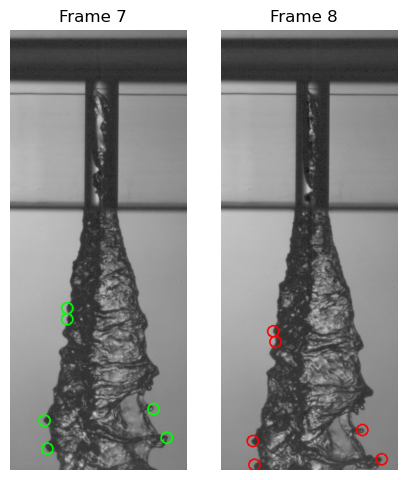

True

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Definisi posisi frame dan displacement
frame_positions = [
   ((259, 689),(255,727)),
    ((283, 741),(290, 780)),
    ((62, 710),(57,747)),
    ((67, 761),(60,790)),
    ((103, 526),(94,548)),
    ((103, 506),(98,567)), 
]

# Load the actual images
frame0 = cv2.imread('../Video/Frames1.20/frame7.bmp', cv2.IMREAD_COLOR)
frame1 = cv2.imread('../Video/Frames1.20/frame8.bmp', cv2.IMREAD_COLOR)

# Draw circles on the images at the bubble's positions
for pos_frame0, pos_frame1 in frame_positions:
    cv2.circle(frame0, pos_frame0, 10, (0, 255, 0), 2)  # Green circle for frame 0
    cv2.circle(frame1, pos_frame1, 10, (0, 0, 255), 2)  # Red circle for frame 1

# Convert images to RGB (Matplotlib expects RGB format)
frame0_rgb = cv2.cvtColor(frame0, cv2.COLOR_BGR2RGB)
frame1_rgb = cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB)

# Display the images
plt.figure( figsize=(5, 10))
plt.subplot(1, 2, 1)
plt.imshow(frame0_rgb)
plt.title('Frame 7  ')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(frame1_rgb)
plt.title('Frame 8  ')
plt.axis('off')

plt.show()

cv2.imwrite('../video/pemilihan fitur/1.20/frame7_with_circles.jpg', frame0)

In [17]:
# Calculate displacement and velocity for each frame position
objectdistance = 0.002  # ukuran diameter pipa
imagedistance = 60  # 0.002 m = 60 pixel pada gambar
frame_rate = 4500  # Frame per detik
velocities = []

for pos_frame0, pos_frame1 in frame_positions:
    # Calculate displacement using the Euclidean distance formula
    displacement = ((pos_frame1[0] - pos_frame0[0]) ** 2 + (pos_frame1[1] - pos_frame0[1]) ** 2) ** 0.5
    
    # Convert displacement from pixel to real distance in meter
    real_distance_m = displacement * (objectdistance / imagedistance)
    
    # Calculate time between two frames (seconds)
    time_between_frames = 1 / frame_rate
    
    # Calculate velocity (meter per second)
    velocity = real_distance_m / time_between_frames

    # Tambahkan kecepatan ke dalam list
    velocities.append(velocity)
    
    print("Displacements :", displacement, "pixels")
    print("Velocity:", velocity, "m/s")
    print()

mean8 = sum(velocities) / len(velocities)

print("Velocity:", mean8, "m/s")

Displacements : 38.2099463490856 pixels
Velocity: 5.731491952362839 m/s

Displacements : 39.6232255123179 pixels
Velocity: 5.943483826847685 m/s

Displacements : 37.33630940518894 pixels
Velocity: 5.600446410778341 m/s

Displacements : 29.832867780352597 pixels
Velocity: 4.474930167052889 m/s

Displacements : 23.769728648009426 pixels
Velocity: 3.565459297201414 m/s

Displacements : 61.204574992397426 pixels
Velocity: 9.180686248859613 m/s

Velocity: 5.7494163171837975 m/s


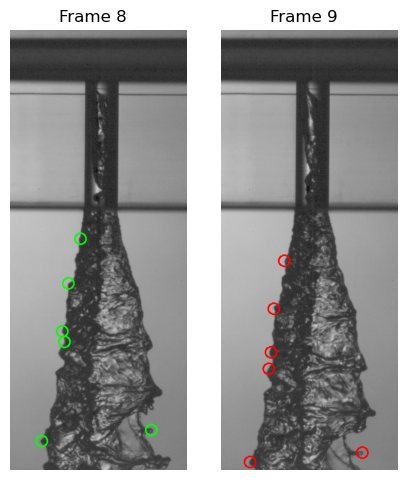

True

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Definisi posisi frame dan displacement
frame_positions = [
   ((255,727),(255,768)),
    ((127,380),(114,420)),
    ((57,747),(52,785)),
    ((94,548),(90,586)),
    ((98,567), (86,616)),
    ((105,461),(95,507)),
               
]
# Load the actual images
frame0 = cv2.imread('../Video/Frames1.20/frame8.bmp', cv2.IMREAD_COLOR)
frame1 = cv2.imread('../Video/Frames1.20/frame9.bmp', cv2.IMREAD_COLOR)

# Draw circles on the images at the bubble's positions
for pos_frame0, pos_frame1 in frame_positions:
    cv2.circle(frame0, pos_frame0, 10, (0, 255, 0), 2)  # Green circle for frame 0
    cv2.circle(frame1, pos_frame1, 10, (0, 0, 255), 2)  # Red circle for frame 1

# Convert images to RGB (Matplotlib expects RGB format)
frame0_rgb = cv2.cvtColor(frame0, cv2.COLOR_BGR2RGB)
frame1_rgb = cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB)

# Display the images
plt.figure( figsize=(5, 10))
plt.subplot(1, 2, 1)
plt.imshow(frame0_rgb)
plt.title('Frame 8  ')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(frame1_rgb)
plt.title('Frame 9  ')
plt.axis('off')

plt.show()

cv2.imwrite('../video/pemilihan fitur/1.20/frame8_with_circles.jpg', frame0)

In [19]:
# Calculate displacement and velocity for each frame position
objectdistance = 0.002  # ukuran diameter pipa
imagedistance = 60  # 0.002 m = 60 pixel pada gambar
frame_rate = 4500  # Frame per detik
velocities = []

for pos_frame0, pos_frame1 in frame_positions:
    # Calculate displacement using the Euclidean distance formula
    displacement = ((pos_frame1[0] - pos_frame0[0]) ** 2 + (pos_frame1[1] - pos_frame0[1]) ** 2) ** 0.5
    
    # Convert displacement from pixel to real distance in meter
    real_distance_m = displacement * (objectdistance / imagedistance)
    
    # Calculate time between two frames (seconds)
    time_between_frames = 1 / frame_rate
    
    # Calculate velocity (meter per second)
    velocity = real_distance_m / time_between_frames

    # Tambahkan kecepatan ke dalam list
    velocities.append(velocity)
    
    print("Displacements :", displacement, "pixels")
    print("Velocity:", velocity, "m/s")
    print()

mean9 = sum(velocities) / len(velocities)

print("Velocity:", mean9, "m/s")

Displacements : 41.0 pixels
Velocity: 6.1499999999999995 m/s

Displacements : 42.05948168962618 pixels
Velocity: 6.308922253443927 m/s

Displacements : 38.3275357934736 pixels
Velocity: 5.74913036902104 m/s

Displacements : 38.2099463490856 pixels
Velocity: 5.731491952362839 m/s

Displacements : 50.44799302251776 pixels
Velocity: 7.567198953377663 m/s

Displacements : 47.07440918375928 pixels
Velocity: 7.061161377563892 m/s

Velocity: 6.42798415096156 m/s


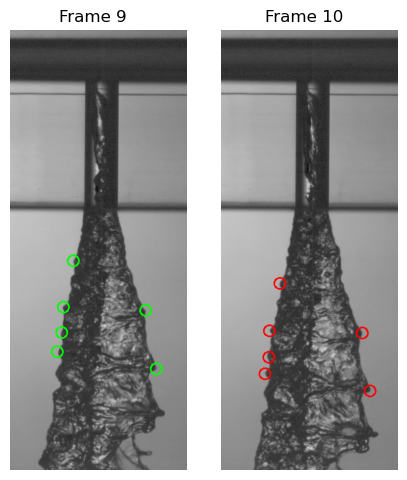

True

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Definisi posisi frame dan displacement
frame_positions = [
   ((96,504),(87, 547)),
    ((114,420),(106,461)),
    ((93, 550),(86, 595)),
    ((85, 585),(79, 625)),
    ((245, 510),(255, 551)),
    ((264, 616),(269, 656)),
]

# Load the actual images
frame0 = cv2.imread('../Video/Frames1.20/frame9.bmp', cv2.IMREAD_COLOR)
frame1 = cv2.imread('../Video/Frames1.20/frame10.bmp', cv2.IMREAD_COLOR)

# Draw circles on the images at the bubble's positions
for pos_frame0, pos_frame1 in frame_positions:
    cv2.circle(frame0, pos_frame0, 10, (0, 255, 0), 2)  # Green circle for frame 0
    cv2.circle(frame1, pos_frame1, 10, (0, 0, 255), 2)  # Red circle for frame 1

# Convert images to RGB (Matplotlib expects RGB format)
frame0_rgb = cv2.cvtColor(frame0, cv2.COLOR_BGR2RGB)
frame1_rgb = cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB)

# Display the images
plt.figure(figsize=(5, 10))
plt.subplot(1, 2, 1)
plt.imshow(frame0_rgb)
plt.title('Frame 9  ')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(frame1_rgb)
plt.title('Frame 10  ')
plt.axis('off')

plt.show()
cv2.imwrite('../video/pemilihan fitur/1.20/frame9_with_circles.jpg', frame0)

In [21]:
# Calculate displacement and velocity for each frame position
objectdistance = 0.002  # ukuran diameter pipa
imagedistance = 60  # 0.002 m = 60 pixel pada gambar
frame_rate = 4500  # Frame per detik
velocities = []

for pos_frame0, pos_frame1 in frame_positions:
    # Calculate displacement using the Euclidean distance formula
    displacement = ((pos_frame1[0] - pos_frame0[0]) ** 2 + (pos_frame1[1] - pos_frame0[1]) ** 2) ** 0.5
    
    # Convert displacement from pixel to real distance in meter
    real_distance_m = displacement * (objectdistance / imagedistance)
    
    # Calculate time between two frames (seconds)
    time_between_frames = 1 / frame_rate
    
    # Calculate velocity (meter per second)
    velocity = real_distance_m / time_between_frames

    # Tambahkan kecepatan ke dalam list
    velocities.append(velocity)
    
    print("Displacements :", displacement, "pixels")
    print("Velocity:", velocity, "m/s")
    print()

mean10 = sum(velocities) / len(velocities)

print("Velocity:", mean10, "m/s")

Displacements : 43.93176527297759 pixels
Velocity: 6.589764790946639 m/s

Displacements : 41.773197148410844 pixels
Velocity: 6.265979572261626 m/s

Displacements : 45.5411901469428 pixels
Velocity: 6.83117852204142 m/s

Displacements : 40.44749683231337 pixels
Velocity: 6.067124524847006 m/s

Displacements : 42.20189569201838 pixels
Velocity: 6.330284353802758 m/s

Displacements : 40.311288741492746 pixels
Velocity: 6.046693311223912 m/s

Velocity: 6.355170845853894 m/s


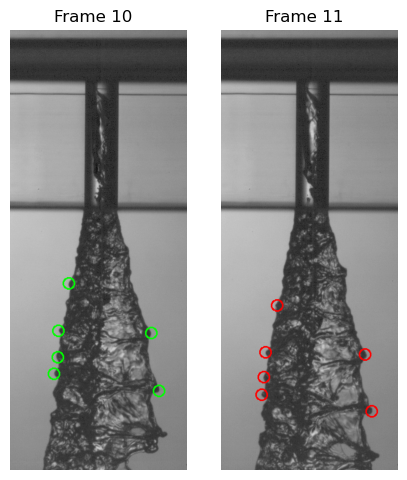

True

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Definisi posisi frame dan displacement
frame_positions = [
   ((106, 461),(101, 501)),
    ((87, 547),(80, 586)),
    ((86, 595),(77, 631)),
    ((79, 625),(73, 663)),
    ((255, 551),(260, 590)),
    ((269, 656),(272, 693)),
]

# Load the actual images
frame0 = cv2.imread('../Video/Frames1.20/frame10.bmp', cv2.IMREAD_COLOR)
frame1 = cv2.imread('../Video/Frames1.20/frame11.bmp', cv2.IMREAD_COLOR)

# Draw circles on the images at the bubble's positions
for pos_frame0, pos_frame1 in frame_positions:
    cv2.circle(frame0, pos_frame0, 10, (0, 255, 0), 2)  # Green circle for frame 0
    cv2.circle(frame1, pos_frame1, 10, (0, 0, 255), 2)  # Red circle for frame 1

# Convert images to RGB (Matplotlib expects RGB format)
frame0_rgb = cv2.cvtColor(frame0, cv2.COLOR_BGR2RGB)
frame1_rgb = cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB)

# Display the images
plt.figure(figsize=(5, 10))
plt.subplot(1, 2, 1)
plt.imshow(frame0_rgb)
plt.title('Frame 10  ')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(frame1_rgb)
plt.title('Frame 11  ')
plt.axis('off')

plt.show()
cv2.imwrite('../video/pemilihan fitur/1.20/frame10_with_circles.jpg', frame0)

In [23]:
# Calculate displacement and velocity for each frame position
objectdistance = 0.002  # ukuran diameter pipa
imagedistance = 60  # 0.002 m = 60 pixel pada gambar
frame_rate = 4500  # Frame per detik
velocities = []

for pos_frame0, pos_frame1 in frame_positions:
    # Calculate displacement using the Euclidean distance formula
    displacement = ((pos_frame1[0] - pos_frame0[0]) ** 2 + (pos_frame1[1] - pos_frame0[1]) ** 2) ** 0.5
    
    # Convert displacement from pixel to real distance in meter
    real_distance_m = displacement * (objectdistance / imagedistance)
    
    # Calculate time between two frames (seconds)
    time_between_frames = 1 / frame_rate
    
    # Calculate velocity (meter per second)
    velocity = real_distance_m / time_between_frames

    # Tambahkan kecepatan ke dalam list
    velocities.append(velocity)
    
    print("Displacements :", displacement, "pixels")
    print("Velocity:", velocity, "m/s")
    print()

mean11 = sum(velocities) / len(velocities)

print("Velocity:", mean11, "m/s")

Displacements : 40.311288741492746 pixels
Velocity: 6.046693311223912 m/s

Displacements : 39.6232255123179 pixels
Velocity: 5.943483826847685 m/s

Displacements : 37.107950630558946 pixels
Velocity: 5.566192594583842 m/s

Displacements : 38.47076812334269 pixels
Velocity: 5.770615218501403 m/s

Displacements : 39.319206502675 pixels
Velocity: 5.89788097540125 m/s

Displacements : 37.12142238654117 pixels
Velocity: 5.5682133579811754 m/s

Velocity: 5.798846547423213 m/s


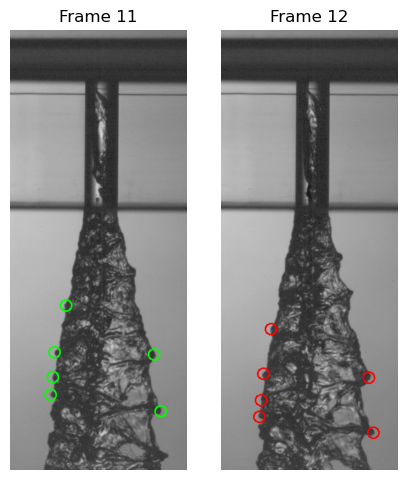

True

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Definisi posisi frame dan displacement
frame_positions = [
   ((101, 501),(90, 544)),
    ((80, 586),(76, 625)),
    ((77, 631),(72, 673)),
    ((73, 663),(69, 703)),
    ((260, 590),(267, 632)),
    ((272, 693),(275, 732)),
]

# Load the actual images
frame0 = cv2.imread('../Video/Frames1.20/frame11.bmp', cv2.IMREAD_COLOR)
frame1 = cv2.imread('../Video/Frames1.20/frame12.bmp', cv2.IMREAD_COLOR)

# Draw circles on the images at the bubble's positions
for pos_frame0, pos_frame1 in frame_positions:
    cv2.circle(frame0, pos_frame0, 10, (0, 255, 0), 2)  # Green circle for frame 0
    cv2.circle(frame1, pos_frame1, 10, (0, 0, 255), 2)  # Red circle for frame 1

# Convert images to RGB (Matplotlib expects RGB format)
frame0_rgb = cv2.cvtColor(frame0, cv2.COLOR_BGR2RGB)
frame1_rgb = cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB)

# Display the images
plt.figure(figsize=(5, 10))
plt.subplot(1, 2, 1)
plt.imshow(frame0_rgb)
plt.title('Frame 11')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(frame1_rgb)
plt.title('Frame 12')
plt.axis('off')

plt.show()
cv2.imwrite('../video/pemilihan fitur/1.20/frame11_with_circles.jpg', frame0)

In [25]:
# Calculate displacement and velocity for each frame position
objectdistance = 0.002  # ukuran diameter pipa
imagedistance = 60  # 0.002 m = 60 pixel pada gambar
frame_rate = 4500  # Frame per detik
velocities = []

for pos_frame0, pos_frame1 in frame_positions:
    # Calculate displacement using the Euclidean distance formula
    displacement = ((pos_frame1[0] - pos_frame0[0]) ** 2 + (pos_frame1[1] - pos_frame0[1]) ** 2) ** 0.5
    
    # Convert displacement from pixel to real distance in meter
    real_distance_m = displacement * (objectdistance / imagedistance)
    
    # Calculate time between two frames (seconds)
    time_between_frames = 1 / frame_rate
    
    # Calculate velocity (meter per second)
    velocity = real_distance_m / time_between_frames

    # Tambahkan kecepatan ke dalam list
    velocities.append(velocity)
    
    print("Displacements :", displacement, "pixels")
    print("Velocity:", velocity, "m/s")
    print()

mean12 = sum(velocities) / len(velocities)

print("Velocity:", mean12, "m/s")

Displacements : 44.384682042344295 pixels
Velocity: 6.657702306351644 m/s

Displacements : 39.20459156782532 pixels
Velocity: 5.8806887351737975 m/s

Displacements : 42.2965719651132 pixels
Velocity: 6.344485794766981 m/s

Displacements : 40.19950248448356 pixels
Velocity: 6.029925372672534 m/s

Displacements : 42.579337712087536 pixels
Velocity: 6.38690065681313 m/s

Displacements : 39.11521443121589 pixels
Velocity: 5.867282164682384 m/s

Velocity: 6.194497505076744 m/s


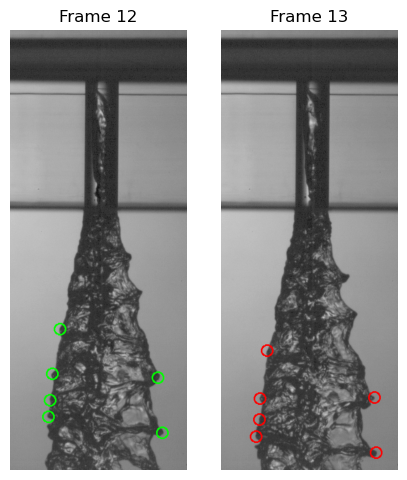

True

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Definisi posisi frame dan displacement
frame_positions = [
   ((90, 544),(83, 583)),
    ((76, 625),(70, 670)),
    ((72, 673),(69, 708)),
    ((69, 703),(63, 739)),
    ((267, 632),(277, 668)),
    ((275, 732),(280, 768)),
]

# Load the actual images
frame0 = cv2.imread('../Video/Frames1.20/frame12.bmp', cv2.IMREAD_COLOR)
frame1 = cv2.imread('../Video/Frames1.20/frame13.bmp', cv2.IMREAD_COLOR)

# Draw circles on the images at the bubble's positions
for pos_frame0, pos_frame1 in frame_positions:
    cv2.circle(frame0, pos_frame0, 10, (0, 255, 0), 2)  # Green circle for frame 0
    cv2.circle(frame1, pos_frame1, 10, (0, 0, 255), 2)  # Red circle for frame 1

# Convert images to RGB (Matplotlib expects RGB format)
frame0_rgb = cv2.cvtColor(frame0, cv2.COLOR_BGR2RGB)
frame1_rgb = cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB)

# Display the images
plt.figure(figsize=(5, 10))
plt.subplot(1, 2, 1)
plt.imshow(frame0_rgb)
plt.title('Frame 12')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(frame1_rgb)
plt.title('Frame 13')
plt.axis('off')

plt.show()
cv2.imwrite('../video/pemilihan fitur/1.20/frame12_with_circles.jpg', frame0)

In [27]:
# Calculate displacement and velocity for each frame position
objectdistance = 0.002  # ukuran diameter pipa
imagedistance = 60  # 0.002 m = 60 pixel pada gambar
frame_rate = 4500  # Frame per detik
velocities = []

for pos_frame0, pos_frame1 in frame_positions:
    # Calculate displacement using the Euclidean distance formula
    displacement = ((pos_frame1[0] - pos_frame0[0]) ** 2 + (pos_frame1[1] - pos_frame0[1]) ** 2) ** 0.5
    
    # Convert displacement from pixel to real distance in meter
    real_distance_m = displacement * (objectdistance / imagedistance)
    
    # Calculate time between two frames (seconds)
    time_between_frames = 1 / frame_rate
    
    # Calculate velocity (meter per second)
    velocity = real_distance_m / time_between_frames

    # Tambahkan kecepatan ke dalam list
    velocities.append(velocity)
    
    print("Displacements :", displacement, "pixels")
    print("Velocity:", velocity, "m/s")
    print()

mean13 = sum(velocities) / len(velocities)

print("Velocity:", mean13, "m/s")

Displacements : 39.6232255123179 pixels
Velocity: 5.943483826847685 m/s

Displacements : 45.39823785126467 pixels
Velocity: 6.809735677689701 m/s

Displacements : 35.12833614050059 pixels
Velocity: 5.269250421075089 m/s

Displacements : 36.49657518178932 pixels
Velocity: 5.474486277268397 m/s

Displacements : 37.36308338453881 pixels
Velocity: 5.604462507680822 m/s

Displacements : 36.345563690772494 pixels
Velocity: 5.451834553615874 m/s

Velocity: 5.758875544029595 m/s


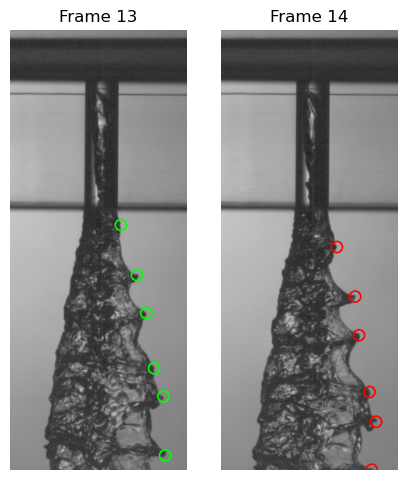

True

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Definisi posisi frame dan displacement
frame_positions = [
   ((200, 355) ,(209, 395)),
    ((229, 446) ,(242, 485)),
    ((246, 515) ,(249, 555)),
    ((260, 615) ,(268, 658)),
    ((277, 666),(280, 712)),
    ((280, 773),(272, 799)),
]

# Load the actual images
frame0 = cv2.imread('../Video/Frames1.20/frame13.bmp', cv2.IMREAD_COLOR)
frame1 = cv2.imread('../Video/Frames1.20/frame14.bmp', cv2.IMREAD_COLOR)

# Draw circles on the images at the bubble's positions
for pos_frame0, pos_frame1 in frame_positions:
    cv2.circle(frame0, pos_frame0, 10, (0, 255, 0), 2)  # Green circle for frame 0
    cv2.circle(frame1, pos_frame1, 10, (0, 0, 255), 2)  # Red circle for frame 1

# Convert images to RGB (Matplotlib expects RGB format)
frame0_rgb = cv2.cvtColor(frame0, cv2.COLOR_BGR2RGB)
frame1_rgb = cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB)

# Display the images
plt.figure(figsize=(5, 10))
plt.subplot(1, 2, 1)
plt.imshow(frame0_rgb)
plt.title('Frame 13')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(frame1_rgb)
plt.title('Frame 14')
plt.axis('off')

plt.show()
cv2.imwrite('../video/pemilihan fitur/1.20/frame13_with_circles.jpg', frame0)

In [29]:
# Calculate displacement and velocity for each frame position
objectdistance = 0.002  # ukuran diameter pipa
imagedistance = 60  # 0.002 m = 60 pixel pada gambar
frame_rate = 4500  # Frame per detik
velocities = []

for pos_frame0, pos_frame1 in frame_positions:
    # Calculate displacement using the Euclidean distance formula
    displacement = ((pos_frame1[0] - pos_frame0[0]) ** 2 + (pos_frame1[1] - pos_frame0[1]) ** 2) ** 0.5
    
    # Convert displacement from pixel to real distance in meter
    real_distance_m = displacement * (objectdistance / imagedistance)
    
    # Calculate time between two frames (seconds)
    time_between_frames = 1 / frame_rate
    
    # Calculate velocity (meter per second)
    velocity = real_distance_m / time_between_frames

    # Tambahkan kecepatan ke dalam list
    velocities.append(velocity)
    
    print("Displacements :", displacement, "pixels")
    print("Velocity:", velocity, "m/s")
    print()

mean14 = sum(velocities) / len(velocities)

print("Velocity:", mean14, "m/s")

Displacements : 41.0 pixels
Velocity: 6.1499999999999995 m/s

Displacements : 41.10960958218893 pixels
Velocity: 6.16644143732834 m/s

Displacements : 40.11234224026316 pixels
Velocity: 6.016851336039474 m/s

Displacements : 43.73785545725808 pixels
Velocity: 6.560678318588711 m/s

Displacements : 46.09772228646444 pixels
Velocity: 6.914658342969665 m/s

Displacements : 27.202941017470888 pixels
Velocity: 4.080441152620633 m/s

Velocity: 5.981511764591137 m/s


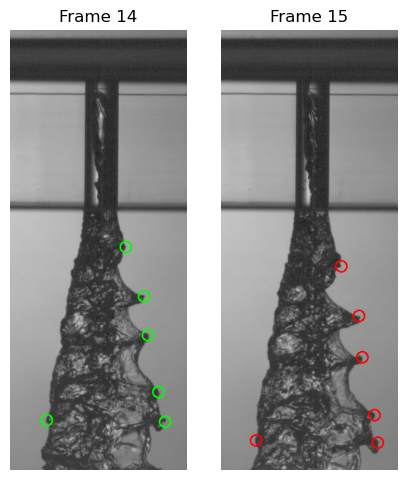

True

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Definisi posisi frame dan displacement
frame_positions = [
   ((209, 395),(217, 430)),
    ((242, 485),(249, 520)),
    ((249, 555),(255, 595)),
    ((268, 658),(277, 700)),
    ((280, 712),(283, 750)),
    ((66,709),(63, 746)),
]

# Load the actual images
frame0 = cv2.imread('../Video/Frames1.20/frame14.bmp', cv2.IMREAD_COLOR)
frame1 = cv2.imread('../Video/Frames1.20/frame15.bmp', cv2.IMREAD_COLOR)

# Draw circles on the images at the bubble's positions
for pos_frame0, pos_frame1 in frame_positions:
    cv2.circle(frame0, pos_frame0, 10, (0, 255, 0), 2)  # Green circle for frame 0
    cv2.circle(frame1, pos_frame1, 10, (0, 0, 255), 2)  # Red circle for frame 1

# Convert images to RGB (Matplotlib expects RGB format)
frame0_rgb = cv2.cvtColor(frame0, cv2.COLOR_BGR2RGB)
frame1_rgb = cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB)

# Display the images
plt.figure(figsize=(5, 10))
plt.subplot(1, 2, 1)
plt.imshow(frame0_rgb)
plt.title('Frame 14')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(frame1_rgb)
plt.title('Frame 15')
plt.axis('off')

plt.show()
cv2.imwrite('../video/pemilihan fitur/1.20/frame14_with_circles.jpg', frame0)

In [31]:
# Calculate displacement and velocity for each frame position
objectdistance = 0.002  # ukuran diameter pipa
imagedistance = 60  # 0.002 m = 60 pixel pada gambar
frame_rate = 4500  # Frame per detik
velocities = []

for pos_frame0, pos_frame1 in frame_positions:
    # Calculate displacement using the Euclidean distance formula
    displacement = ((pos_frame1[0] - pos_frame0[0]) ** 2 + (pos_frame1[1] - pos_frame0[1]) ** 2) ** 0.5
    
    # Convert displacement from pixel to real distance in meter
    real_distance_m = displacement * (objectdistance / imagedistance)
    
    # Calculate time between two frames (seconds)
    time_between_frames = 1 / frame_rate
    
    # Calculate velocity (meter per second)
    velocity = real_distance_m / time_between_frames

    # Tambahkan kecepatan ke dalam list
    velocities.append(velocity)
    
    print("Displacements :", displacement, "pixels")
    print("Velocity:", velocity, "m/s")
    print()

mean15 = sum(velocities) / len(velocities)

print("Velocity:", mean15, "m/s")

Displacements : 35.90264614203248 pixels
Velocity: 5.3853969213048725 m/s

Displacements : 35.6931365951495 pixels
Velocity: 5.353970489272425 m/s

Displacements : 40.44749683231337 pixels
Velocity: 6.067124524847006 m/s

Displacements : 42.95346318982906 pixels
Velocity: 6.443019478474359 m/s

Displacements : 38.118237105091836 pixels
Velocity: 5.717735565763775 m/s

Displacements : 37.12142238654117 pixels
Velocity: 5.5682133579811754 m/s

Velocity: 5.755910056273936 m/s


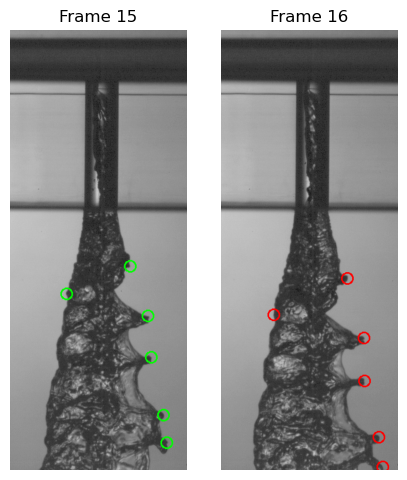

True

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Definisi posisi frame dan displacement
frame_positions = [
    ((217, 430), (228, 452)),
    ((249, 520), (258, 560)),
    ((255, 595), (259, 638)),
    ((277, 700), (285, 740)),
    ((283, 750), (292, 794)),
    ((102, 480), (95, 518)),
]

# Load the actual images
frame0 = cv2.imread('../Video/Frames1.20/frame15.bmp', cv2.IMREAD_COLOR)
frame1 = cv2.imread('../Video/Frames1.20/frame16.bmp', cv2.IMREAD_COLOR)

# Draw circles on the images at the bubble's positions
for pos_frame0, pos_frame1 in frame_positions:
    cv2.circle(frame0, pos_frame0, 10, (0, 255, 0), 2)  # Green circle for frame 0
    cv2.circle(frame1, pos_frame1, 10, (0, 0, 255), 2)  # Red circle for frame 1

# Convert images to RGB (Matplotlib expects RGB format)
frame0_rgb = cv2.cvtColor(frame0, cv2.COLOR_BGR2RGB)
frame1_rgb = cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB)

# Display the images
plt.figure(figsize=(5, 10))
plt.subplot(1, 2, 1)
plt.imshow(frame0_rgb)
plt.title('Frame 15')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(frame1_rgb)
plt.title('Frame 16')
plt.axis('off')

plt.show()
cv2.imwrite('../video/pemilihan fitur/1.20/frame15_with_circles.jpg', frame0)

In [33]:
# Calculate displacement and velocity for each frame position
objectdistance = 0.002  # ukuran diameter pipa
imagedistance = 60  # 0.002 m = 60 pixel pada gambar
frame_rate = 4500  # Frame per detik
velocities = []

for pos_frame0, pos_frame1 in frame_positions:
    # Calculate displacement using the Euclidean distance formula
    displacement = ((pos_frame1[0] - pos_frame0[0]) ** 2 + (pos_frame1[1] - pos_frame0[1]) ** 2) ** 0.5
    
    # Convert displacement from pixel to real distance in meter
    real_distance_m = displacement * (objectdistance / imagedistance)
    
    # Calculate time between two frames (seconds)
    time_between_frames = 1 / frame_rate
    
    # Calculate velocity (meter per second)
    velocity = real_distance_m / time_between_frames

    # Tambahkan kecepatan ke dalam list
    velocities.append(velocity)
    
    print("Displacements :", displacement, "pixels")
    print("Velocity:", velocity, "m/s")
    print()

mean16 = sum(velocities) / len(velocities)

print("Velocity:", mean16, "m/s")

Displacements : 24.596747752497688 pixels
Velocity: 3.689512162874653 m/s

Displacements : 41.0 pixels
Velocity: 6.1499999999999995 m/s

Displacements : 43.18564576337837 pixels
Velocity: 6.4778468645067555 m/s

Displacements : 40.792156108742276 pixels
Velocity: 6.118823416311342 m/s

Displacements : 44.91102314577124 pixels
Velocity: 6.736653471865686 m/s

Displacements : 38.63935817272331 pixels
Velocity: 5.795903725908497 m/s

Velocity: 5.828123273577822 m/s


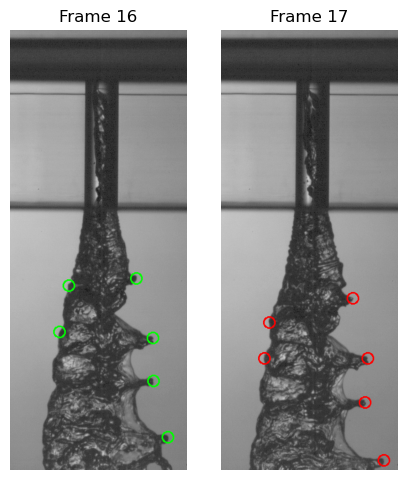

True

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Definisi posisi frame dan displacement
frame_positions = [
    ((228, 452),(238, 488)),
    ((258, 560),(265, 597)),
    ((259, 638),(260, 677)),
    ((285, 740),(294, 782)),
    ((106, 465),(87, 532)),
    ((89, 549), (78, 597)),
]

# Load the actual images
frame0 = cv2.imread('../Video/Frames1.20/frame16.bmp', cv2.IMREAD_COLOR)
frame1 = cv2.imread('../Video/Frames1.20/frame17.bmp', cv2.IMREAD_COLOR)

# Draw circles on the images at the bubble's positions
for pos_frame0, pos_frame1 in frame_positions:
    cv2.circle(frame0, pos_frame0, 10, (0, 255, 0), 2)  # Green circle for frame 0
    cv2.circle(frame1, pos_frame1, 10, (0, 0, 255), 2)  # Red circle for frame 1

# Convert images to RGB (Matplotlib expects RGB format)
frame0_rgb = cv2.cvtColor(frame0, cv2.COLOR_BGR2RGB)
frame1_rgb = cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB)

# Display the images
plt.figure(figsize=(5, 10))
plt.subplot(1, 2, 1)
plt.imshow(frame0_rgb)
plt.title('Frame 16')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(frame1_rgb)
plt.title('Frame 17')
plt.axis('off')

plt.show()
cv2.imwrite('../video/pemilihan fitur/1.20/frame16_with_circles.jpg', frame0)

In [35]:
# Calculate displacement and velocity for each frame position
objectdistance = 0.002  # ukuran diameter pipa
imagedistance = 60  # 0.002 m = 60 pixel pada gambar
frame_rate = 4500  # Frame per detik
velocities = []

for pos_frame0, pos_frame1 in frame_positions:
    # Calculate displacement using the Euclidean distance formula
    displacement = ((pos_frame1[0] - pos_frame0[0]) ** 2 + (pos_frame1[1] - pos_frame0[1]) ** 2) ** 0.5
    
    # Convert displacement from pixel to real distance in meter
    real_distance_m = displacement * (objectdistance / imagedistance)
    
    # Calculate time between two frames (seconds)
    time_between_frames = 1 / frame_rate
    
    # Calculate velocity (meter per second)
    velocity = real_distance_m / time_between_frames

    # Tambahkan kecepatan ke dalam list
    velocities.append(velocity)
    
    print("Displacements :", displacement, "pixels")
    print("Velocity:", velocity, "m/s")
    print()

mean17 = sum(velocities) / len(velocities)

print("Velocity:", mean17, "m/s")

Displacements : 37.36308338453881 pixels
Velocity: 5.604462507680822 m/s

Displacements : 37.656340767525464 pixels
Velocity: 5.64845111512882 m/s

Displacements : 39.01281840626232 pixels
Velocity: 5.851922760939348 m/s

Displacements : 42.95346318982906 pixels
Velocity: 6.443019478474359 m/s

Displacements : 69.6419413859206 pixels
Velocity: 10.44629120788809 m/s

Displacements : 49.24428900898052 pixels
Velocity: 7.386643351347079 m/s

Velocity: 6.896798403576419 m/s


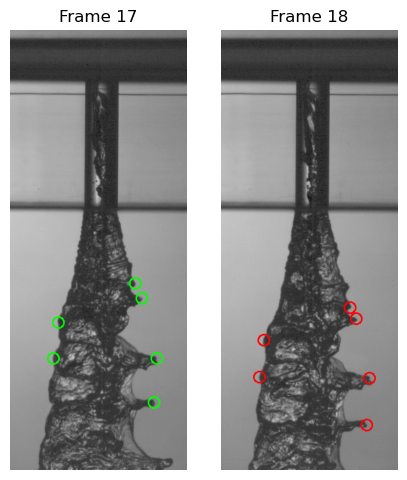

True

In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Definisi posisi frame dan displacement
frame_positions = [
    ((226, 461),(233, 505)),
    ((238, 488),(244, 525)),
    ((265, 597),(268, 633)),
    ((260, 677),(263, 718)),
    ((87, 532),(77, 564)),
    ((78, 597),(69, 631)),
]


# Load the actual images
frame0 = cv2.imread('../Video/Frames1.20/frame17.bmp', cv2.IMREAD_COLOR)
frame1 = cv2.imread('../Video/Frames1.20/frame18.bmp', cv2.IMREAD_COLOR)

# Draw circles on the images at the bubble's positions
for pos_frame0, pos_frame1 in frame_positions:
    cv2.circle(frame0, pos_frame0, 10, (0, 255, 0), 2)  # Green circle for frame 0
    cv2.circle(frame1, pos_frame1, 10, (0, 0, 255), 2)  # Red circle for frame 1

# Convert images to RGB (Matplotlib expects RGB format)
frame0_rgb = cv2.cvtColor(frame0, cv2.COLOR_BGR2RGB)
frame1_rgb = cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB)

# Display the images
plt.figure(figsize=(5, 10))
plt.subplot(1, 2, 1)
plt.imshow(frame0_rgb)
plt.title('Frame 17')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(frame1_rgb)
plt.title('Frame 18')
plt.axis('off')

plt.show()
cv2.imwrite('../video/pemilihan fitur/1.20/frame17_with_circles.jpg', frame0)

In [37]:
# Calculate displacement and velocity for each frame position
objectdistance = 0.002  # ukuran diameter pipa
imagedistance = 60  # 0.002 m = 60 pixel pada gambar
frame_rate = 4500  # Frame per detik
velocities = []

for pos_frame0, pos_frame1 in frame_positions:
    # Calculate displacement using the Euclidean distance formula
    displacement = ((pos_frame1[0] - pos_frame0[0]) ** 2 + (pos_frame1[1] - pos_frame0[1]) ** 2) ** 0.5
    
    # Convert displacement from pixel to real distance in meter
    real_distance_m = displacement * (objectdistance / imagedistance)
    
    # Calculate time between two frames (seconds)
    time_between_frames = 1 / frame_rate
    
    # Calculate velocity (meter per second)
    velocity = real_distance_m / time_between_frames

    # Tambahkan kecepatan ke dalam list
    velocities.append(velocity)
    
    print("Displacements :", displacement, "pixels")
    print("Velocity:", velocity, "m/s")
    print()

mean18 = sum(velocities) / len(velocities)

print("Velocity:", mean18, "m/s")

Displacements : 44.553338819890925 pixels
Velocity: 6.683000822983639 m/s

Displacements : 37.48332962798263 pixels
Velocity: 5.622499444197394 m/s

Displacements : 36.124783736376884 pixels
Velocity: 5.418717560456533 m/s

Displacements : 41.10960958218893 pixels
Velocity: 6.16644143732834 m/s

Displacements : 33.52610922848042 pixels
Velocity: 5.028916384272063 m/s

Displacements : 35.17101079013795 pixels
Velocity: 5.275651618520692 m/s

Velocity: 5.699204544626443 m/s


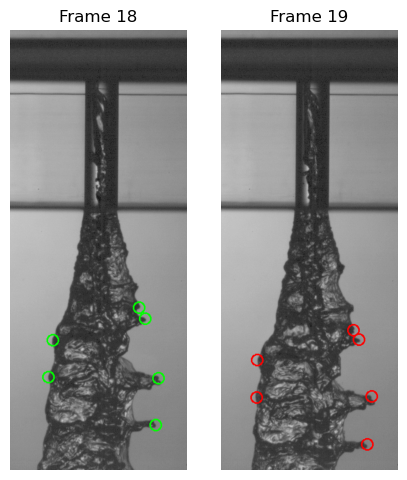

True

In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Definisi posisi frame dan displacement
frame_positions = [
    ((233, 505),(239, 546)),
    ((244, 525),(249, 563)),
    ((268, 633),(272, 666)),
    ((263, 718),(264, 753)),
    ((77, 564),(65, 600)),
    ((69, 631),(64, 668)),
]

# Load the actual images
frame0 = cv2.imread('../Video/Frames1.20/frame18.bmp', cv2.IMREAD_COLOR)
frame1 = cv2.imread('../Video/Frames1.20/frame19.bmp', cv2.IMREAD_COLOR)

# Draw circles on the images at the bubble's positions
for pos_frame0, pos_frame1 in frame_positions:
    cv2.circle(frame0, pos_frame0, 10, (0, 255, 0), 2)  # Green circle for frame 0
    cv2.circle(frame1, pos_frame1, 10, (0, 0, 255), 2)  # Red circle for frame 1

# Convert images to RGB (Matplotlib expects RGB format)
frame0_rgb = cv2.cvtColor(frame0, cv2.COLOR_BGR2RGB)
frame1_rgb = cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB)

# Display the images
plt.figure(figsize=(5, 10))
plt.subplot(1, 2, 1)
plt.imshow(frame0_rgb)
plt.title('Frame 18')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(frame1_rgb)
plt.title('Frame 19')
plt.axis('off')

plt.show()
cv2.imwrite('../video/pemilihan fitur/1.20/frame18_with_circles.jpg', frame0)

In [39]:
# Calculate displacement and velocity for each frame position
objectdistance = 0.002  # ukuran diameter pipa
imagedistance = 60  # 0.002 m = 60 pixel pada gambar
frame_rate = 4500  # Frame per detik
velocities = []

for pos_frame0, pos_frame1 in frame_positions:
    # Calculate displacement using the Euclidean distance formula
    displacement = ((pos_frame1[0] - pos_frame0[0]) ** 2 + (pos_frame1[1] - pos_frame0[1]) ** 2) ** 0.5
    
    # Convert displacement from pixel to real distance in meter
    real_distance_m = displacement * (objectdistance / imagedistance)
    
    # Calculate time between two frames (seconds)
    time_between_frames = 1 / frame_rate
    
    # Calculate velocity (meter per second)
    velocity = real_distance_m / time_between_frames

    # Tambahkan kecepatan ke dalam list
    velocities.append(velocity)
    
    print("Displacements :", displacement, "pixels")
    print("Velocity:", velocity, "m/s")
    print()

mean19 = sum(velocities) / len(velocities)

print("Velocity:", mean19, "m/s")

Displacements : 41.43669871020132 pixels
Velocity: 6.215504806530198 m/s

Displacements : 38.3275357934736 pixels
Velocity: 5.74913036902104 m/s

Displacements : 33.24154027718932 pixels
Velocity: 4.986231041578399 m/s

Displacements : 35.014282800023196 pixels
Velocity: 5.252142420003479 m/s

Displacements : 37.94733192202055 pixels
Velocity: 5.692099788303083 m/s

Displacements : 37.33630940518894 pixels
Velocity: 5.600446410778341 m/s

Velocity: 5.582592472702423 m/s


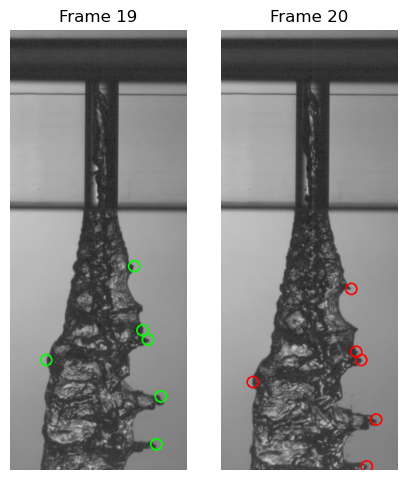

True

In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Definisi posisi frame dan displacement
frame_positions = [
    ((239, 546),(244, 585)),
    ((249, 563),(253, 600)),
    ((272, 666),(280, 708)),
    ((264, 753),(263, 793)),
    ((65, 600),(57, 640)),
    ((224, 430),(235, 471)),
]

# Load the actual images
frame0 = cv2.imread('../Video/Frames1.20/frame19.bmp', cv2.IMREAD_COLOR)
frame1 = cv2.imread('../Video/Frames1.20/frame20.bmp', cv2.IMREAD_COLOR)

# Draw circles on the images at the bubble's positions
for pos_frame0, pos_frame1 in frame_positions:
    cv2.circle(frame0, pos_frame0, 10, (0, 255, 0), 2)  # Green circle for frame 0
    cv2.circle(frame1, pos_frame1, 10, (0, 0, 255), 2)  # Red circle for frame 1

# Convert images to RGB (Matplotlib expects RGB format)
frame0_rgb = cv2.cvtColor(frame0, cv2.COLOR_BGR2RGB)
frame1_rgb = cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB)

# Display the images
plt.figure(figsize=(5, 10))
plt.subplot(1, 2, 1)
plt.imshow(frame0_rgb)
plt.title('Frame 19')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(frame1_rgb)
plt.title('Frame 20')
plt.axis('off')

plt.show()
cv2.imwrite('../video/pemilihan fitur/1.20/frame19_with_circles.jpg', frame0)

In [41]:
# Calculate displacement and velocity for each frame position
objectdistance = 0.002  # ukuran diameter pipa
imagedistance = 60  # 0.002 m = 60 pixel pada gambar
frame_rate = 4500  # Frame per detik
velocities = []

for pos_frame0, pos_frame1 in frame_positions:
    # Calculate displacement using the Euclidean distance formula
    displacement = ((pos_frame1[0] - pos_frame0[0]) ** 2 + (pos_frame1[1] - pos_frame0[1]) ** 2) ** 0.5
    
    # Convert displacement from pixel to real distance in meter
    real_distance_m = displacement * (objectdistance / imagedistance)
    
    # Calculate time between two frames (seconds)
    time_between_frames = 1 / frame_rate
    
    # Calculate velocity (meter per second)
    velocity = real_distance_m / time_between_frames

    # Tambahkan kecepatan ke dalam list
    velocities.append(velocity)
    
    print("Displacements :", displacement, "pixels")
    print("Velocity:", velocity, "m/s")
    print()

mean20 = sum(velocities) / len(velocities)

print("Velocity:", mean20, "m/s")

Displacements : 39.319206502675 pixels
Velocity: 5.89788097540125 m/s

Displacements : 37.21558813185679 pixels
Velocity: 5.582338219778519 m/s

Displacements : 42.7551166528639 pixels
Velocity: 6.413267497929584 m/s

Displacements : 40.01249804748511 pixels
Velocity: 6.0018747071227665 m/s

Displacements : 40.792156108742276 pixels
Velocity: 6.118823416311342 m/s

Displacements : 42.44997055358225 pixels
Velocity: 6.367495583037337 m/s

Velocity: 6.063613399930134 m/s


In [42]:
means = [mean1, mean2, mean3, mean4, mean5, mean6, mean7, mean8, mean9, mean10,mean11,mean12,mean13,mean14,mean15,mean16,mean17,mean18,mean19,mean20]

rata_rata = sum(means) / len(means)
print("Rata-rata (10 frames): {:.2f}".format(rata_rata))

Rata-rata (10 frames): 6.00


In [43]:
for mean in means:
    print("{:.2f}".format(mean))

5.85
5.75
6.26
6.23
6.38
5.59
5.90
5.75
6.43
6.36
5.80
6.19
5.76
5.98
5.76
5.83
6.90
5.70
5.58
6.06


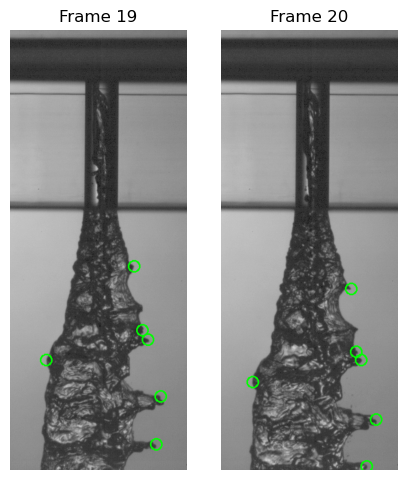

True

In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Definisi posisi frame dan displacement
frame_positions = [
    ((239, 546),(244, 585)),
    ((249, 563),(253, 600)),
    ((272, 666),(280, 708)),
    ((264, 753),(263, 793)),
    ((65, 600),(57, 640)),
    ((224, 430),(235, 471)),
]

# Load the actual images
frame0 = cv2.imread('../Video/Frames1.20/frame19.bmp', cv2.IMREAD_COLOR)
frame1 = cv2.imread('../Video/Frames1.20/frame20.bmp', cv2.IMREAD_COLOR)

# Draw circles on the images at the bubble's positions
for pos_frame0, pos_frame1 in frame_positions:
    cv2.circle(frame0, pos_frame0, 10, (0, 255, 0), 2)  # Green circle for frame 0
    cv2.circle(frame1, pos_frame1, 10, (0, 255, 0), 2)  # Red circle for frame 1

# Convert images to RGB (Matplotlib expects RGB format)
frame0_rgb = cv2.cvtColor(frame0, cv2.COLOR_BGR2RGB)
frame1_rgb = cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB)

# Display the images
plt.figure(figsize=(5, 10))
plt.subplot(1, 2, 1)
plt.imshow(frame0_rgb)
plt.title('Frame 19')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(frame1_rgb)
plt.title('Frame 20')
plt.axis('off')

plt.show()
cv2.imwrite('../video/pemilihan fitur/1.20/frame20_with_circles.jpg', frame1)